<a href="https://colab.research.google.com/github/gamertech2001/Face_Recognition-Using-OpenCV/blob/main/Face_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=0610f244f674ba345c2229f3c67d8e88b3350d06688d3fc034366e1f53eb3405
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
!mkdir known
!wget https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O known/bill.jpg
!wget https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg -O known/obama.jpg

--2021-03-03 17:53:47--  https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg
Resolving www.biography.com (www.biography.com)... 151.101.2.98, 151.101.130.98, 151.101.66.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.2.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151791 (148K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 148.23K  --.-KB/s    in 0.01s   

2021-03-03 17:53:47 (9.67 MB/s) - ‘known/elon.jpg’ saved [151791/151791]

--2021-03-03 17:53:47--  https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 93.184.220.70
Connecting to pbs.twimg.com (pbs.twimg.com)|93.184.220.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23065 (23K) [image/jpeg]
Saving to: ‘known/bill.jpg’

known/bill.jpg      100%[===================>]  22.52K  --.-KB/s    in 0s      

2021-

In [ ]:
!mkdir unknown
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Elon_Musk_2015.jpg/409px-Elon_Musk_2015.jpg -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg

--2020-11-27 16:49:08--  https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Elon_Musk_2015.jpg/409px-Elon_Musk_2015.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41061 (40K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  40.10K  --.-KB/s    in 0.006s  

2020-11-27 16:49:08 (6.24 MB/s) - ‘unknown/1.jpg’ saved [41061/41061]

--2020-11-27 16:49:08--  https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 104.16.119.145, 104.16.120.145, 104.16.118.145, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|104.16.119.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119795 (117K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/

Processing 1.jpg


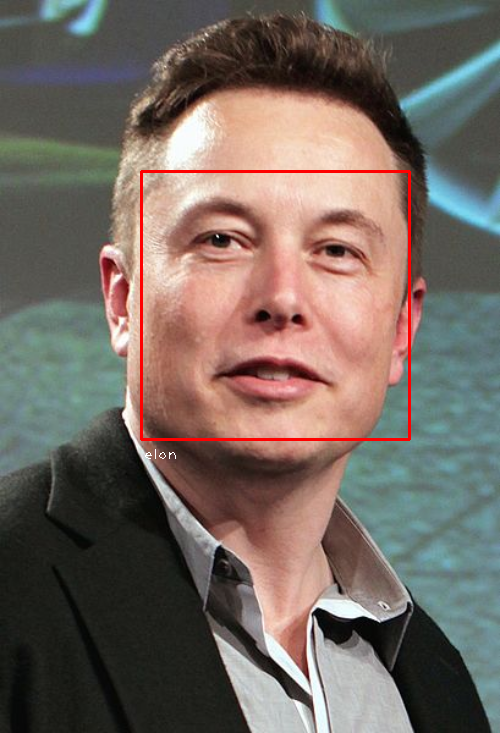

Processing 4.jpg


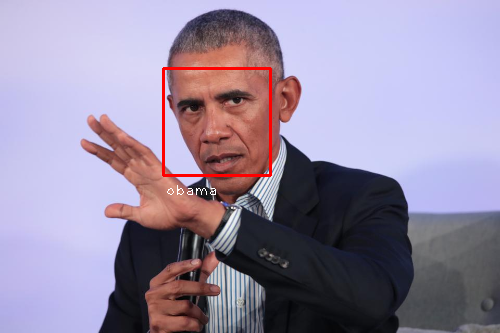

Processing 2.jpg
Processing 3.jpg


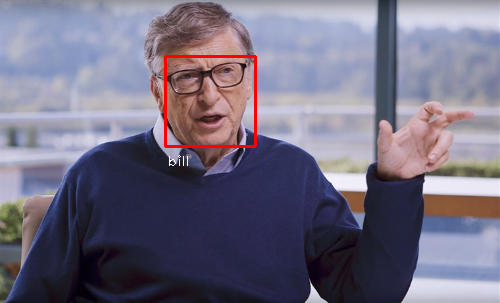

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)
            

    # print(results)

